In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.24


Импорт необходимых модулей

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pylab as plt

Расчет базовых PVT свойств нефти

In [3]:
p_0 = 10
p_n = 460
dp = 20 
p_atm = np.arange(p_0, p_n, dp) #
t_C = 80 #
gamma_gas_ = 0.8 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.86 # удельная плотность нефти, по воде;
gamma_wat_ = 1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 120 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
PVTcorr = 0; # Выбор набора корреляций для расчета;
# Зададим параметры сепарации для учета влияния на свойства флюида
Ksep_ = 0.5 # коэффициент сепарации дополнительынй для сепарации заданной в потоке;
Psep_ = 50 # давление при которой была сепарация, атм;
Tsep = 80 # температура при которой была сепарция, С;
pb_list, rs_list, mu_oil_list, compr_oil_list, bo_list, rho_oil_list, cpo_list  = [], [], [], [], [], [], []
z_list, rho_gas_list, mu_gas_list,compr_gas_list, bg_list, cpg_list = [], [], [], [], [], []
rho_wat_list, mu_wat_list, compr_wat_list, bw_list, cpw_list = [], [], [], [], []
ST_og_list, ST_wg_list = [], []
for p in p_atm:
    pb = UniflocVBA.PVT_pb_atma(t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    pb_list.append(pb)
    z = UniflocVBA.PVT_bo_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    z_list.append(z)
    rs = UniflocVBA.PVT_rs_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rs_list.append(rs)
    mu_oil_cP = UniflocVBA.PVT_mu_oil_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_oil_list.append(mu_oil_cP)
    compr_oil_1atm = UniflocVBA.PVT_compressibility_oil_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_oil_list.append(compr_oil_1atm)
    b_bo_m3m3 = UniflocVBA.PVT_bo_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bo_list.append(b_bo_m3m3)
    rho_oil_kgm3 = UniflocVBA.PVT_rho_oil_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_oil_list.append(rho_oil_kgm3)
    rho_gas_kgm3 = UniflocVBA.PVT_rho_gas_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_gas_list.append(rho_gas_kgm3)
    cpo = UniflocVBA.PVT_cp_oil_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpo_list.append(cpo)
    mu_gas_cp = UniflocVBA.PVT_mu_gas_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_gas_list.append(mu_gas_cp)
    compr_gas_1atm = UniflocVBA.PVT_compressibility_gas_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_gas_list.append(compr_gas_1atm)
    b_gas_m3m3 = UniflocVBA.PVT_bg_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bg_list.append(b_gas_m3m3)
    cpg = UniflocVBA.PVT_cp_gas_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpg_list.append(cpg)
    rho_wat_kgm3 = UniflocVBA.PVT_rho_wat_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_wat_list.append(rho_wat_kgm3)
    mu_wat_cp = UniflocVBA.PVT_mu_wat_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_wat_list.append(mu_wat_cp)
    compr_wat_1atm = UniflocVBA.PVT_compressibility_wat_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_wat_list.append(compr_wat_1atm)
    b_wat_m3m3 = UniflocVBA.PVT_bw_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bw_list.append(b_wat_m3m3)
    cpw = UniflocVBA.PVT_cp_wat_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpw_list.append(cpw)
    ST_og = UniflocVBA.PVT_ST_oilgas_Nm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    ST_og_list.append(ST_og)
    ST_wg = UniflocVBA.PVT_ST_watgas_Nm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    ST_wg_list.append(ST_wg)    

Давление насыщения, z - фактор, газосодержание

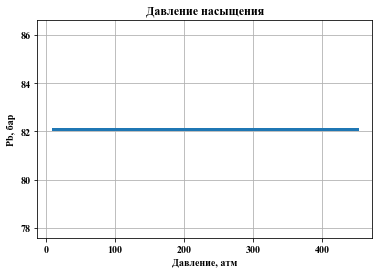

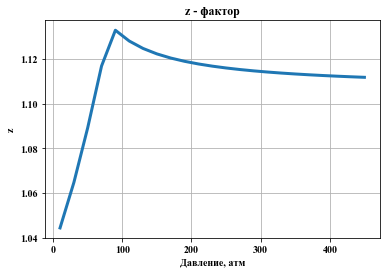

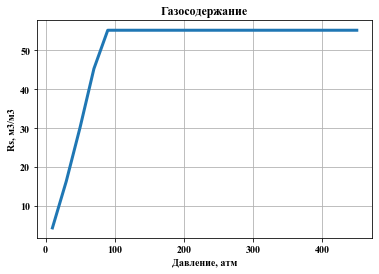

In [4]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

ys = [pb_list, z_list, rs_list]
titles = ['Давление насыщения','z - фактор',  'Газосодержание']
ylabels = ['Pb, бар', 'z' , 'Rs, м3/м3']
for i in range(3):
    plt.grid(True)
    plt.title(titles[i], color='black', family='fantasy')
    plt.ylabel(ylabels[i], color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
    plt.show()

Объемные коэффициенты нефти, газа и воды

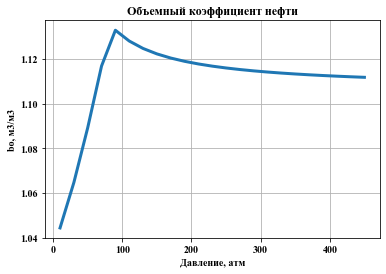

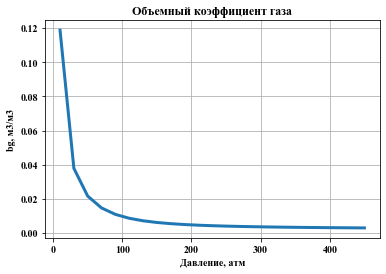

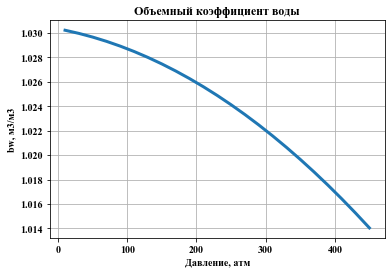

In [5]:
ys = [bo_list, bg_list, bw_list]
titles = ['Объемный коэффициент нефти','Объемный коэффициент газа', 'Объемный коэффициент воды']
ylabels = ['bo, м3/м3', 'bg, м3/м3' , 'bw, м3/м3']
for i in range(3):
    plt.grid(True)
    plt.title(titles[i], color='black', family='fantasy')
    plt.ylabel(ylabels[i], color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
    plt.show()

Вязкости нефти, газа и воды

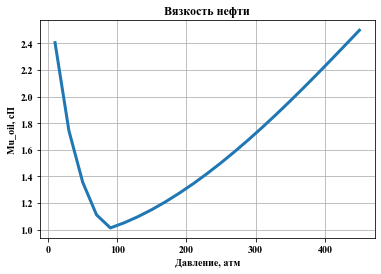

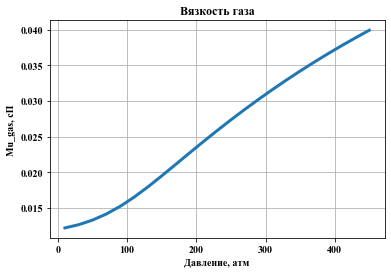

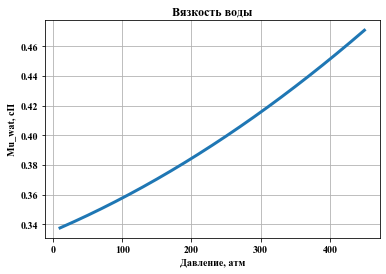

In [6]:
ys = [mu_oil_list, mu_gas_list, mu_wat_list]
titles = ['Вязкость нефти','Вязкость газа', 'Вязкость воды']
ylabels = ['Mu_oil, сП', 'Mu_gas, сП' , 'Mu_wat, сП']
for i in range(3):
    plt.grid(True)
    plt.title(titles[i], color='black', family='fantasy')
    plt.ylabel(ylabels[i], color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
    plt.show()

Плотности нефти, газа и воды

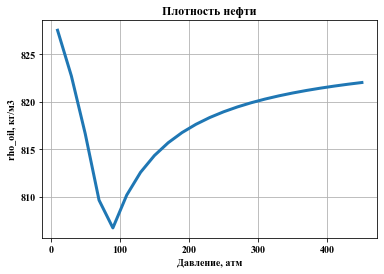

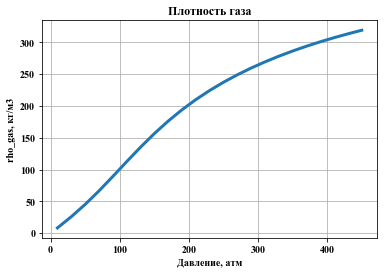

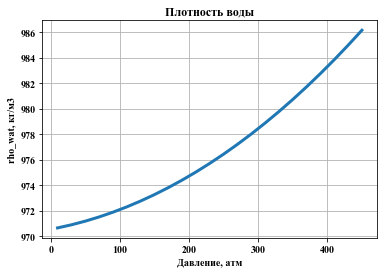

In [7]:
ys = [rho_oil_list, rho_gas_list, rho_wat_list]
titles = ['Плотность нефти','Плотность газа',  'Плотность воды']
ylabels = ['rho_oil, кг/м3', 'rho_gas, кг/м3' , 'rho_wat, кг/м3']
for i in range(3):
    plt.grid(True)
    plt.title(titles[i], color='black', family='fantasy')
    plt.ylabel(ylabels[i], color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
    plt.show()

Сжимаемости нефти, газа и воды

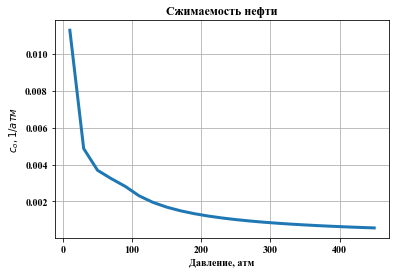

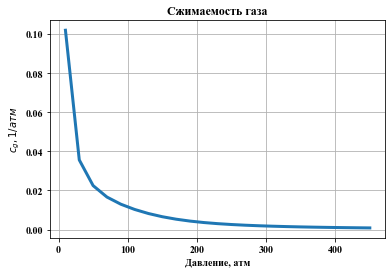

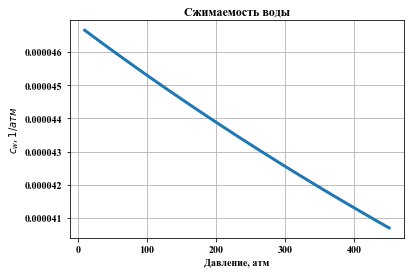

In [8]:
ys = [compr_oil_list, compr_gas_list, compr_wat_list]
titles = ['Сжимаемость нефти','Сжимаемость газа',  'Сжимаемость воды']
ylabels = ['$c_o, 1/атм$', '$c_g, 1/атм$' , '$c_w, 1/атм$']
for i in range(3):
    plt.grid(True)
    plt.title(titles[i], color='black', family='fantasy')
    plt.ylabel(ylabels[i], color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
    plt.show()

Коэффициент поверхностного натяжения (нефть-газ) и (вода-газ)

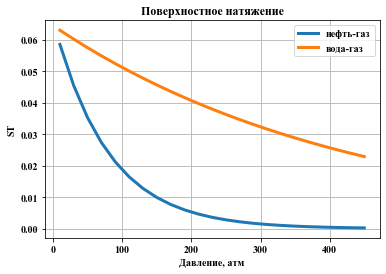

In [9]:
ys = [ST_og_list, ST_wg_list]
for i in range(2):
    plt.grid(True)
    plt.title('Поверхностное натяжение', color='black', family='fantasy')
    plt.ylabel('ST', color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
plt.legend(('нефть-газ','вода-газ')) 
plt.show()

Теплоемкость нефти, газа и воды

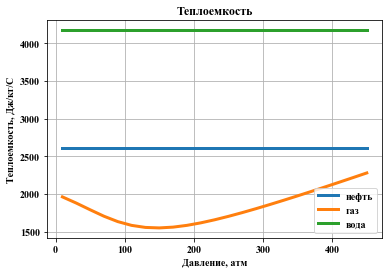

In [10]:
ys = [cpo_list, cpg_list, cpw_list]
for i in range(3):
    plt.grid(True)
    plt.title('Теплоемкость', color='black', family='fantasy')
    plt.ylabel('Теплоемкость, Дж/кг/С', color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
plt.legend(('нефть','газ','вода')) 
plt.show()